In [1]:
!pip install causal-learn

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install dowhy

You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install pydot graphviz


You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.


In [4]:
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.GraphUtils import GraphUtils
from causallearn.utils.cit import fisherz
import pandas as pd

In [30]:
# Load and clean the dataset
df = pd.read_csv("training_dataset.csv")
df = df.dropna()
df = df.select_dtypes(include=["float64", "int64"])  # Use only numeric columns
data = df.to_numpy()

# Run PC algorithm
cg = pc(data, independence_test_method=fisherz, alpha=0.08)

# Optional: set variable names
cg.G.names = df.columns.tolist()

  0%|          | 0/14 [00:00<?, ?it/s]

In [31]:
for edge in cg.G.get_graph_edges():
    print(edge)

X3 --> X1
X7 --> X1
X8 --> X1
X10 --> X1
X11 --> X1
X2 --- X7
X2 --- X14
X5 --> X3
X6 --> X3
X4 --> X5
X7 --> X5
X5 --> X12
X14 --> X5
X7 --- X14
X8 --> X11
X9 --> X11
X9 --> X13
X10 --> X13
X14 --> X13


In [40]:
import pandas as pd
from causallearn.search.ConstraintBased.PC import pc
from causallearn.utils.cit import fisherz

# Load and clean dataset
df = pd.read_csv("training_dataset.csv")
df = df.dropna()
df = df.select_dtypes(include=["float64", "int64"])
data = df.to_numpy()
column_names = df.columns.tolist()

# Run PC algorithm
cg = pc(data, independence_test_method=fisherz, alpha=0.05)

# Assign column names to the graph
cg.G.names = column_names

# Print causal edges with real variable names
print("Causal Edges:") ########GROUND TRUTH
for edge in cg.G.get_graph_edges():
    node1_name = edge.node1.get_name()  # e.g., "X3"
    node2_name = edge.node2.get_name()  # e.g., "X7"

    # Convert names like "X3" → index 2 (zero-based)
    i = int(node1_name[1:]) - 1
    j = int(node2_name[1:]) - 1

    ep1 = edge.endpoint1
    ep2 = edge.endpoint2

    src = column_names[i]
    tgt = column_names[j]

    print(f"{src} --> {tgt}")


  0%|          | 0/14 [00:00<?, ?it/s]

Causal Edges:
corner_3_x --> corner_0_x
corner_3_y --> corner_0_x
angle_from_180 --> corner_0_x
corner_0_y --> corner_3_x
corner_2_x --> corner_1_x
corner_2_y --> corner_1_x
corner_1_y --> corner_2_x
corner_2_x --> vy
omega_z --> corner_2_x
corner_2_y --> vx
corner_3_x --> omega_z
corner_3_y --> vx
area --> vx
area --> vz
angle_from_180 --> vz
omega_z --> vz


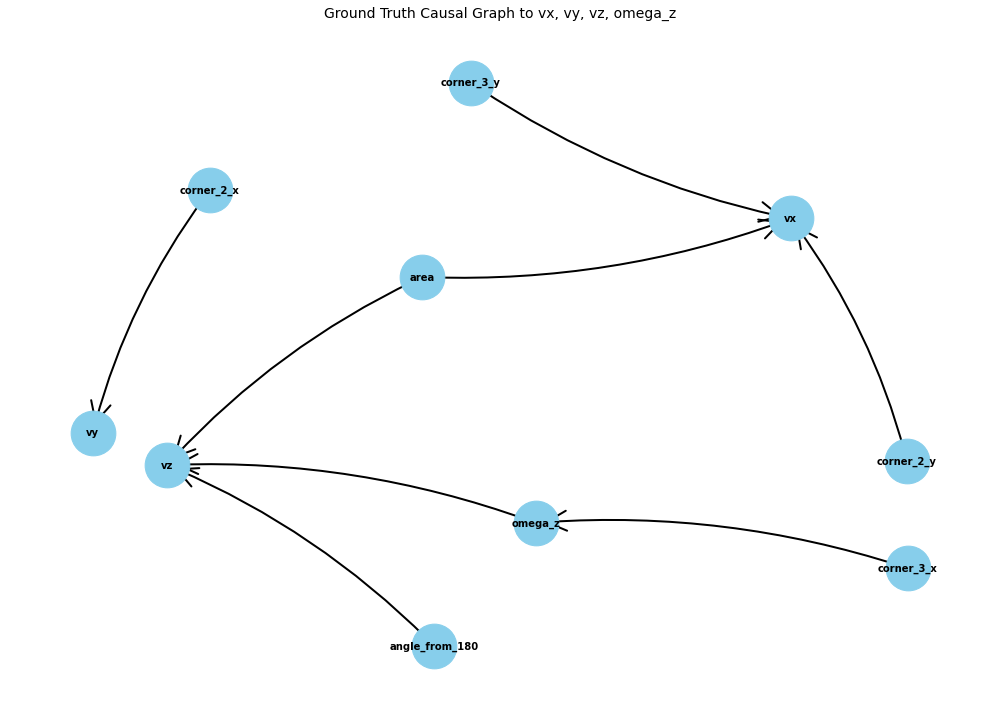

In [14]:
import matplotlib.pyplot as plt
import networkx as nx

# Define edges mapping to vx, vy, vz, or omega_z
edges = [
    ("corner_2_y", "vx"),
    ("corner_3_y", "vx"),
    ("area", "vx"),
    ("corner_2_x", "vy"),
    ("area", "vz"),
    ("angle_from_180", "vz"),
    ("omega_z", "vz"),
    ("corner_3_x", "omega_z")
]

# Create directed graph
G2 = nx.DiGraph()
G2.add_edges_from(edges)

# Positioning using Kamada-Kawai layout for better spacing
pos2 = nx.kamada_kawai_layout(G2)

# Draw graph
plt.figure(figsize=(14, 10))
nx.draw_networkx_nodes(G2, pos2, node_size=2000, node_color='skyblue')
nx.draw_networkx_edges(
    G2, pos2,
    arrowstyle='->',
    arrows=True,
    arrowsize=50,
    edge_color='black',
    width=2,
    connectionstyle='arc3,rad=0.1'
)
nx.draw_networkx_labels(G2, pos2, font_size=10, font_weight='bold')

plt.title("Ground Truth Causal Graph to vx, vy, vz, omega_z", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [12]:
# ---- Step 1: Load CSVs ----
df = pd.read_csv("training_dataset.csv")

required_columns = [
    "corner_0_x", "corner_0_y",
    "corner_1_x", "corner_1_y",
    "corner_2_x", "corner_2_y",
    "corner_3_x", "corner_3_y",
    "area", "angle_from_180"
]

# Filter DataFrame to keep only these columns and numeric types
df = df[required_columns]

feature_df = df.select_dtypes(include=["float64", "int64"])
column_names = df.columns.tolist()

output_df = pd.read_csv("prediction_output.csv") 
# print(latent_df.shape[1])

# ---- Step 2: Concatenate ----
full_df = pd.concat([feature_df, output_df], axis=1)
full_df = full_df.dropna()
column_names = full_df.columns.tolist()

print(column_names)
# # ---- Step 3: Run PC Algorithm ----
data = full_df.to_numpy()
cg = pc(data, independence_test_method=fisherz, alpha=0.05)

cg.G.names = column_names

# Print causal edges with real variable names
print("Causal Edges:") ########GROUND TRUTH
for edge in cg.G.get_graph_edges():
    node1_name = edge.node1.get_name()  # e.g., "X3"
    node2_name = edge.node2.get_name()  # e.g., "X7"

    # Convert names like "X3" → index 2 (zero-based)
    i = int(node1_name[1:]) - 1
    j = int(node2_name[1:]) - 1

    ep1 = edge.endpoint1
    ep2 = edge.endpoint2

    src = column_names[i]
    tgt = column_names[j]

    print(f"{src} --> {tgt}")

['corner_0_x', 'corner_0_y', 'corner_1_x', 'corner_1_y', 'corner_2_x', 'corner_2_y', 'corner_3_x', 'corner_3_y', 'area', 'angle_from_180', 'vx', 'vy', 'vz', 'omega_z']


  0%|          | 0/14 [00:00<?, ?it/s]

Causal Edges:
corner_3_x --> corner_0_x
corner_3_y --> corner_0_x
angle_from_180 --> corner_0_x
corner_2_y --> corner_0_y
corner_3_x --> corner_0_y
corner_3_y --> corner_0_y
area --> corner_0_y
angle_from_180 --> corner_0_y
vy --> corner_0_y
corner_2_x --> corner_1_x
corner_2_y --> corner_1_x
corner_2_x --> corner_1_y
corner_2_y --> corner_1_y
corner_3_x --> corner_1_y
area --> corner_1_y
area --> vz
area --> omega_z
angle_from_180 --> vz
vx --> vz
vy --> omega_z
omega_z --> vz


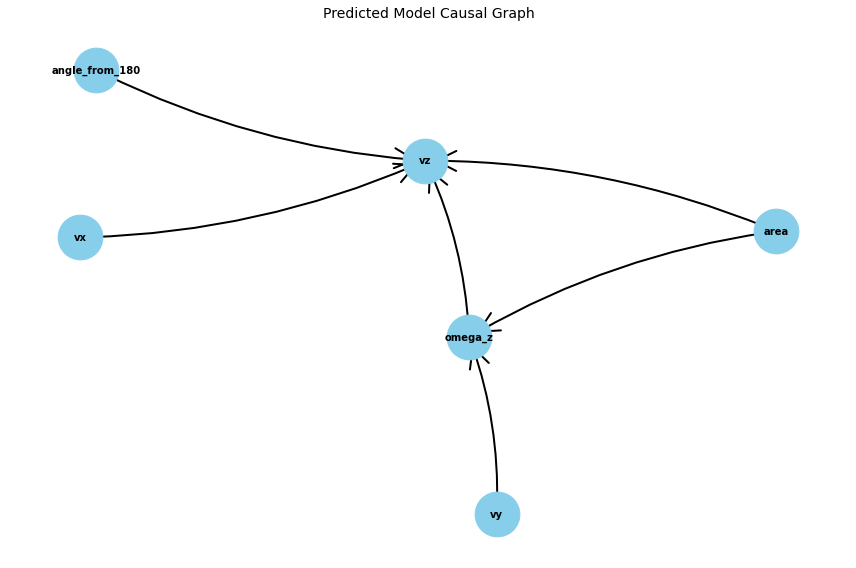

In [15]:
# Define edges that map to vz or omega_z
edges = [
    ("area", "vz"),
    ("angle_from_180", "vz"),
    ("vx", "vz"),
    ("omega_z", "vz"),
    ("area", "omega_z"),
    ("vy", "omega_z")
]

# Create directed graph
G3 = nx.DiGraph()
G3.add_edges_from(edges)

# Position using Kamada-Kawai layout
pos3 = nx.kamada_kawai_layout(G3)

# Draw the graph
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G3, pos3, node_size=2000, node_color='skyblue')
nx.draw_networkx_edges(
    G3, pos3,
    arrowstyle='->',
    arrows=True,
    arrowsize=50,
    edge_color='black',
    width=2,
    connectionstyle='arc3,rad=0.1'
)
nx.draw_networkx_labels(G3, pos3, font_size=10, font_weight='bold')

plt.title("Predicted Model Causal Graph", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [17]:
target_vars = {"vx", "vy", "vz", "omega_z"}

# Define full ground truth edges
edges_gt_all = {
    ("corner_3_x", "corner_0_x"),
    ("corner_3_y", "corner_0_x"),
    ("angle_from_180", "corner_0_x"),
    ("corner_0_y", "corner_3_x"),
    ("corner_2_x", "corner_1_x"),
    ("corner_2_y", "corner_1_x"),
    ("corner_1_y", "corner_2_x"),
    ("corner_2_x", "vy"),
    ("omega_z", "corner_2_x"),
    ("corner_2_y", "vx"),
    ("corner_3_x", "omega_z"),
    ("corner_3_y", "vx"),
    ("area", "vx"),
    ("area", "vz"),
    ("angle_from_180", "vz"),
    ("omega_z", "vz")
}

# Define full predicted edges
edges_pred_all = {
    ("corner_3_x", "corner_0_x"),
    ("corner_3_y", "corner_0_x"),
    ("angle_from_180", "corner_0_x"),
    ("corner_2_y", "corner_0_y"),
    ("corner_3_x", "corner_0_y"),
    ("corner_3_y", "corner_0_y"),
    ("area", "corner_0_y"),
    ("angle_from_180", "corner_0_y"),
    ("vy", "corner_0_y"),
    ("corner_2_x", "corner_1_x"),
    ("corner_2_y", "corner_1_x"),
    ("corner_2_x", "corner_1_y"),
    ("corner_2_y", "corner_1_y"),
    ("corner_3_x", "corner_1_y"),
    ("area", "corner_1_y"),
    ("area", "vz"),
    ("area", "omega_z"),
    ("angle_from_180", "vz"),
    ("vx", "vz"),
    ("vy", "omega_z"),
    ("omega_z", "vz")
}

# Filter only those edges where the target is involved (either as source or destination)
def filter_target_edges(edges, targets):
    return {e for e in edges if e[0] in targets or e[1] in targets}

edges_gt = filter_target_edges(edges_gt_all, target_vars)
edges_pred = filter_target_edges(edges_pred_all, target_vars)

# Compute intersections and differences
common_edges = edges_gt & edges_pred
missed_edges = edges_gt - edges_pred
spurious_edges = edges_pred - edges_gt

# Compute precision and recall
precision = len(common_edges) / len(edges_pred) if edges_pred else 0
recall = len(common_edges) / len(edges_gt) if edges_gt else 0

# Print results
print(f"Precision : {precision:.3f}")
print(f" Recall : {recall:.3f}\n")


Precision : 0.429
 Recall : 0.333

